<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Дмитрий, доброго дня! рад приветствовать тебя вновь) <br />
(А дальше - шаблонная часть, как ты заметил по другим спринтам)<br>
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Загрузка-данных" data-toc-modified-id="1.-Загрузка-данных-1">1. Загрузка данных</a></span></li><li><span><a href="#2.-Умножение-матриц" data-toc-modified-id="2.-Умножение-матриц-2">2. Умножение матриц</a></span></li><li><span><a href="#3.-Алгоритм-преобразования" data-toc-modified-id="3.-Алгоритм-преобразования-3">3. Алгоритм преобразования</a></span></li><li><span><a href="#4.-Проверка-алгоритма" data-toc-modified-id="4.-Проверка-алгоритма-4">4. Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5">Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6">Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Необходимо защитить данные клиентов страховой компании «Хоть потоп». Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

План работы:
1. Загрузить и изучить данные.
2. Ответить на вопрос и обосновать решение.
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
3. Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.
4. Запрограммировать этот алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.

## 1. Загрузка данных

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/insurance.csv') # чтение и сохранение файла

Напишем функцию для exploratory data analysis.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
тааак, данные на базе. И это главное:)

In [3]:
def exploration(data):
    '''
    функция EDA
    параметр - исследуемый dataframe
    return - общая информация о dataframe
    '''
    print('\033[1m Основная информация \033[0m')
    print()
    data.info()
    print(100*'*')
    print()
    print('\033[1m Первые пять строк \033[0m')
    display(data.head())
    print(100*'*')
    print()
    print('\033[1m Проверка на дубликаты \033[0m')
    print('Количество дубликатов = ', data.duplicated().sum())
    print(100*'*')
    print()
    print('\033[1m Основная статистическая информация \033[0m')
    display(data.describe().T)
    print(100*'*')
    print()
    print('\033[1m Распределение данных (гистограммы) \033[0m')
    data.hist(bins=50, figsize=(20,15), edgecolor='#76d2db', linewidth=2)
    plt.show()
    print(100*'*')
    print()
    print('\033[1m Корреляция данных \033[0m')
    plt.figure()
    sns.heatmap(data.corr(), annot = True, fmt = '0.3f', cmap="YlGnBu")
    plt.show()

 Основная информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
****************************************************************************************************

 Первые пять строк 


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


****************************************************************************************************

 Проверка на дубликаты 
Количество дубликатов =  153
****************************************************************************************************

 Основная статистическая информация 


,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


****************************************************************************************************

 Распределение данных (гистограммы) 


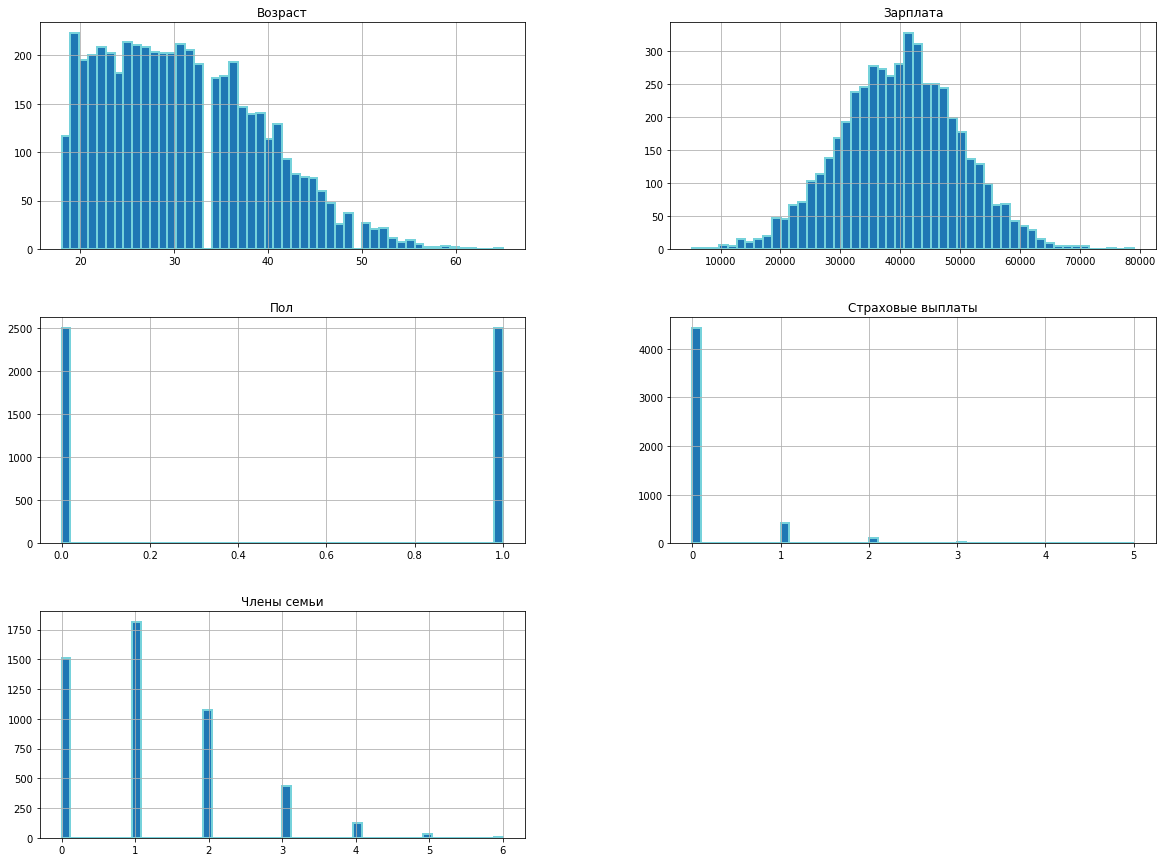

****************************************************************************************************

 Корреляция данных 


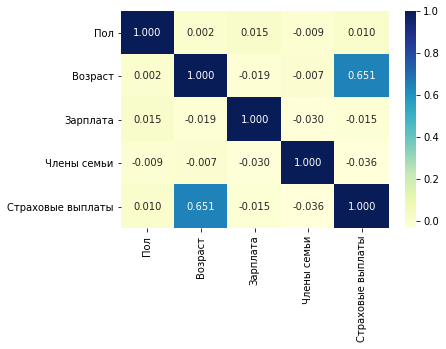

In [4]:
exploration(df)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОК, хорошо. напомню только, что корреляция Спирмена/Пирсона - только для количественных данных разоабатывалась. Бинарные, номинальные - такие как пол, например, - не стоит включать в анализ.

In [5]:
df.drop_duplicates(subset=None, keep='first', inplace=True) #удалим дубликаты
#df = df.reset_index()

В целом данные представлены в хорошем качестве. Обнаружено небольшое количество дубликатов. Можно отметить высокую корреляцию (0.65) возратста и страховых выплат.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Здорово. Хорошо, когда есть аналитическая культура - обязательно делать первичный анализ данных, не смотря на проект)

## 2. Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
(Xw-y)^2\rightarrow min_w
$$
$$
(Xw-y)(Xw-y)^T\rightarrow min_w
$$
$$
X^TXw = X^Ty
$$
$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Если в задаче линеной регрессии $a = Xw$ умножить $X (m, n)$ на обратимую матрицу $Z$, размерности $(n, n)$, то при вычислении весов $w = (X^T X)^{-1} X^T y$ предсказания $a$ не изменятся.

**Обоснование:** Для доказательства подставим вместо $X \rightarrow XZ$

$$
a_{new} = XZw_{new}
$$

$$
w_{new} = ((XZ)^T XZ)^{-1}(XZ)^T y
$$
подставим $w_{new}$ в $a_{new}$ и преобразуем:

$a_{new} = X Z ((XZ)^T XZ)^{-1}(XZ)^T y = \\X Z (Z^TX^T XZ)^{-1}Z^T X^T y = \\X Z (X^TXZ)^{-1} (Z^T)^{-1} Z^T X^T y = \\X Z Z^{-1}(X^TX)^{-1} (Z^T)^{-1} Z^T X^T y = \\X E (X^TX)^{-1} E  X^T y = \\X (X^TX)^{-1} X^T y =  X w$

Для раскрытия скобок и преобразований использованы свойства матриц:

Транспонированное произведение матриц равно произведению транспонированных матриц, взятых в обратном порядке:
 - $ (AB)^T = B^T A^T $

Произведение матриц ассоциативно:
 - $ (AB)C = A(BC) $

Свойства обратных и единичных матриц:
 - $ AA^{-1} = A^{-1}A = E $
 - $ AE = EA = A $
 - $ (AB)^{-1} = B^{-1}A^{-1} $

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
отлично с этим! есть контакт.

## 3. Алгоритм преобразования

**Алгоритм**

1. Генерируем случайную матрицу Z (n,n), n - число кодируемых признаков.
2. Проверяем ее на обратимость.
3. Вычисляем обратную матрицу Z.
4. Умножаем исходную матрицу X на матрицу Z.

**Обоснование**

Согласно доказательству выше, при умножении матрицы признаков X на произвольную, обратимую матрицу Z, качество линейной регрессии останется неизменным.  
Пространство признаков можно преобразовать к первоначальному виду, умножив на обратную матрицу.  
$ (XZ)Z^{-1} = X(ZZ^{-1}) = XE = X $

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Тут ожидался ещё план действий для пункта 4) Делай раз, делай два, делай три

## 4. Проверка алгоритма

Разделим наши данные на признаки и целевую переменную

In [6]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Вычислим r2 линейной регрессии на исходных данных.

In [7]:
model = LinearRegression()
round(cross_val_score(model, features, target, scoring='r2').mean(),4)

0.4297

Изменим признаки в соответствии с алгоритмом.  
Создадим случайную матрицу.

In [8]:
n = features.shape[1]
np.random.seed(20)
Z = np.random.normal(size=(n,n))
Z

array([[ 0.88389311,  0.19586502,  0.35753652, -2.34326191],
       [-1.08483259,  0.55969629,  0.93946935, -0.97848104],
       [ 0.50309684,  0.40641447,  0.32346101, -0.49341088],
       [-0.79201679, -0.84236793, -1.27950266,  0.24571517]])

Убедимся, что наша матрица обратима.

In [9]:
np.linalg.inv(Z)

array([[ 0.21152388, -0.53786562, -0.12028991, -0.36622811],
       [-1.13011632,  0.47439007,  5.08231316,  1.31734562],
       [ 0.54426017, -0.01104771, -3.29519731, -1.47061355],
       [-0.35838626, -0.16491936, -0.1233449 , -0.25241849]])

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
и есть проверка на обратимость. ОК. Можно ещё в функцию одеть. Вот, например, как ниже:

Закодируем данные

In [10]:
encoded_features = features@Z

Вычислим r2 линейной регрессии на кодированных данных.

In [11]:
model = LinearRegression()
round(cross_val_score(model, encoded_features, target, scoring='r2').mean(),4)

0.4297

Качество модели не изменилось.

In [12]:
features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


Преобразуем наши данные в первоначальный вид.

In [13]:
round(encoded_features@np.linalg.inv(Z)).head()

,0,1,2,3
0,1.0,41.0,49600.0,1.0
1,-0.0,46.0,38000.0,1.0
2,-0.0,29.0,21000.0,0.0
3,-0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0


Данные восстановлены.

Мы провели реализацию алгоритма кодирования признаков и убедились, что данный алгоритм никак не влияет на качество модели - данный инструмент можно использовать в дальнейшем для кодирования признаков.

## Общий вывод

Цель проекта - защитить данные клиентов страховой компании.

Решение - предложен алгоритм преобразования данных путем матричного умножения.  
Доказано, что при таком кодировании данных предсказания модели линейной регрессии не изменятся.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОК, Дмитрий, Хорошая работа получилась)<br>
Всё, в общем-то, по делу и точно.<br>
    
Если рассматривать передачу данных третьим лицам, то к преимуществам данного подхода можно отнести, в первую очередь, ощутимую экономию ресурсов по сравнению с некоторыми известными алгоритмами шифрования, в особенности это касается ассиметричных алгоритмов с достаточно длинными ключами (AES, RSA), которые требуют много процессорного времени.<br><br>
    
К главному недостатку подхода можно отнести увеличение сложности проверки на вырожденность преобразования с ростом количества признаков в выборке. В рассмотренном случае необходимо подобрать подходящую матрицу размера  4×4 . Однако, если признаки будут исчисляться тысячами, что в теории всегда надо положить, то расчет соответствующих определителей может быть крайне ресурсозатратным. Но и эту проблему можно будет решить)<br><br>
    
Если есть время и желание, то можно воту этот маткриал просмотреть:<br>
Обзоры по применению криптографии в машинном обучении: https://arxiv.org/pdf/1902.04109.pdf, https://www.researchgate.net/publication/342746786_Some_Applications_of_Machine_Learning_in_Cryptography
Подробнее про аналогичный алгоритм: https://www.cs.cmu.edu/~rjhall/JOS_revised_May_31a.pdf
<font color='green'><font color='green'>
Спасибо) Успешного дальнейшего обучения

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования